In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# loading MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

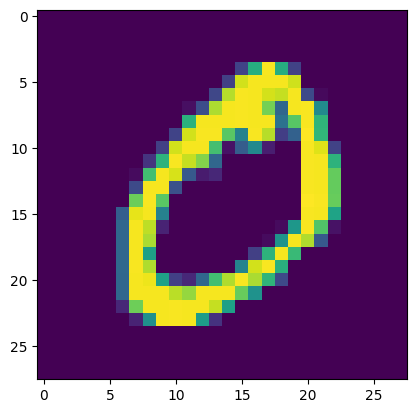

In [5]:
import matplotlib.pyplot as plt

# Checking the image
plt.imshow(X_train[1])

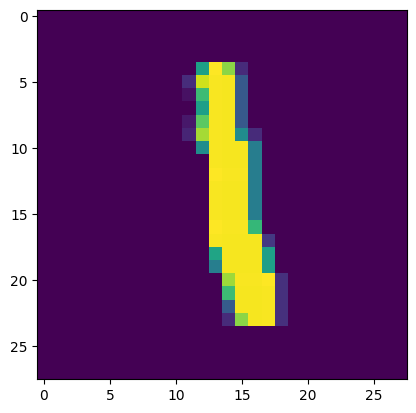

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

In [7]:
# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
# defining model
model= Sequential()
model.add(Flatten(input_shape=(28,28))) # converts 2D input into a 1D vector.
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/Users/sultan/Projects/handwritten-digit-recognition/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) # Compiling the model: defining the loss function, optimizer, and evaluation metric
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8554 - loss: 0.4953 - val_accuracy: 0.9573 - val_loss: 0.1457
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9630 - loss: 0.1234 - val_accuracy: 0.9643 - val_loss: 0.1201
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9743 - loss: 0.0891 - val_accuracy: 0.9698 - val_loss: 0.1013
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9703 - val_loss: 0.0959
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9697 - val_loss: 0.1007
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9697 - val_loss: 0.1056
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9708 - val_loss: 0.1088
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0243 - 

In [10]:
y_prob = model.predict(X_test) # probability distribution
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


array([[1.14904341e-18, 9.85187197e-17, 1.46208479e-12, ...,
        5.88484737e-15, 4.60047254e-08, 6.57736507e-27],
       [5.49900523e-22, 7.36634400e-15, 1.00000000e+00, ...,
        1.96206642e-18, 2.19592584e-34, 2.49206018e-28],
       [4.80840931e-12, 9.99998808e-01, 4.59026872e-10, ...,
        4.97229735e-07, 7.77735244e-13, 6.60235607e-16],
       ...,
       [7.72083222e-23, 5.21899350e-17, 1.45144607e-19, ...,
        2.58358178e-15, 2.50446040e-12, 1.51532471e-31],
       [4.52829586e-22, 1.23786155e-25, 3.18517042e-20, ...,
        1.07525065e-11, 5.24555164e-20, 1.74697821e-31],
       [6.19917110e-18, 1.27570444e-25, 1.31500550e-17, ...,
        5.74606100e-18, 1.30828903e-27, 9.43733532e-32]], dtype=float32)

In [11]:
y_pred = y_prob.argmax(axis=1) # prediction
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9774

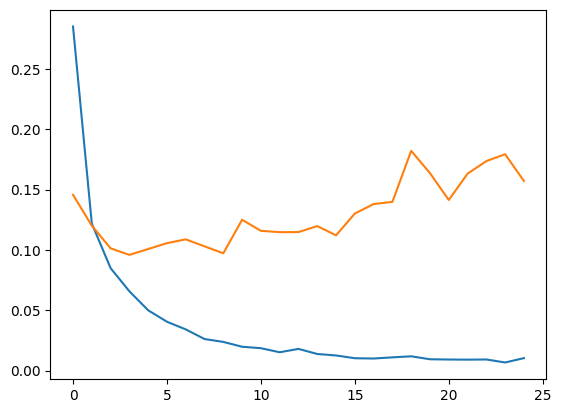

In [14]:
# plotting training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

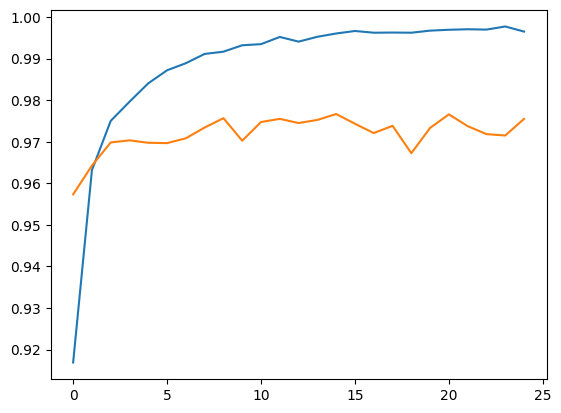

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])